# MSCS 634 - Advanced Data Mining for Data-Driven Insights and Predictive Modeling
## Deliverable 1: Data Collection, Cleaning, and Exploration 
**Dataset:** Adult Income Dataset from UCI Machine Learning Repository

### Objective
Prepare the Adult Income dataset for data mining tasks through collection, cleaning, and exploratory data analysis (EDA).

### Reasons for selecting this dataset
 - Meets the project requirements:  ~32,000 records and 14 attributes (a mix of numerical and categorical features).
 - Contains missing values, duplicate records, inconsistent categorical formatting, and numeric outliers, making it ideal for data cleaning practice.
 - Provides real-world relevance, reflecting socio-economic patterns that can be analyzed and visualized.
 - Supports a wide range of preprocessing and EDA techniques, including imputation, standardization, outlier detection, and feature correlation.

### Load the Dataset and Inspect its structure

In [1]:
import pandas as pd

# Define the column names as specified in the dataset documentation (https://archive.ics.uci.edu/dataset/2/adult)
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

# Load the dataset from the UCI Machine Learning Repository
# Specify '?' as NA and strip spaces for consistency
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
df = pd.read_csv(url, names=columns, na_values='?', skipinitialspace=True)

# Display first 5 rows of the dataset
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
# Display structure of the dataset
df.info()       # Overview of data types and non-null counts
df.describe()   # Summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Data Cleaning Steps

#### Handle Missing Values

In [3]:
# Display count of missing values in each column
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [4]:
# For each column with missing values, fill the missing entries with the mode (most frequent value)
# This is appropriate for categorical attributes
for col in ['workclass', 'occupation', 'native-country']:
    df[col] = df[col].fillna(df[col].mode()[0])

# Display count of missing values after filling for confirmation
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

**Insight:** Imputed missing values in workclass, occupation, and native-country using the mode (most frequent value) since they are categorical attributes. This preserved data while maintaining realistic distributions.

#### Remove Duplicates and Standardize Format

In [5]:
# Count and remove any duplicate rows
print("Duplicates before:", df.duplicated().sum())        # Shows how many duplicate rows exist
df.drop_duplicates(inplace=True)
print("Duplicates after:", df.duplicated().sum())

# For all object (string) columns, strip whitespace and convert to lowercase
# This helps standardize categorical values (e.g., "Private" vs "private")
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].apply(lambda col: col.str.strip().str.lower())

Duplicates before: 24
Duplicates after: 0


**Insight:** Checked for duplicate rows using *df.duplicated()* and removed them. Also converted all string columns to lowercase and stripped whitespace. This prevented inconsistent labels like "Private" vs "private".

#### Identify and Address Noisy Data (Outliers)

In [ ]:
# Step: Identify numerical columns
num_cols = df.select_dtypes(include='number').columns

# Step: Calculate IQR for each numeric column
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Step: Filter out rows that fall outside 1.5*IQR range
df_iqr = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Step: Compare before and after
print(f"Original dataset shape: {df.shape}")
print(f"After IQR outlier removal: {df_iqr.shape}")

# Replace the original DataFrame
df = df_iqr

Original dataset shape: (32537, 15)
After IQR outlier removal: (18983, 15)


**Insight:** Applied the Interquartile Range (IQR) method to detect and remove extreme values in numeric columns. This helped reduce the influence of outliers in features like *capital-gain* and *hours-per-week*, which could distort modeling results.

### Exploratory Data Analysis (EDA)

#### Histograms

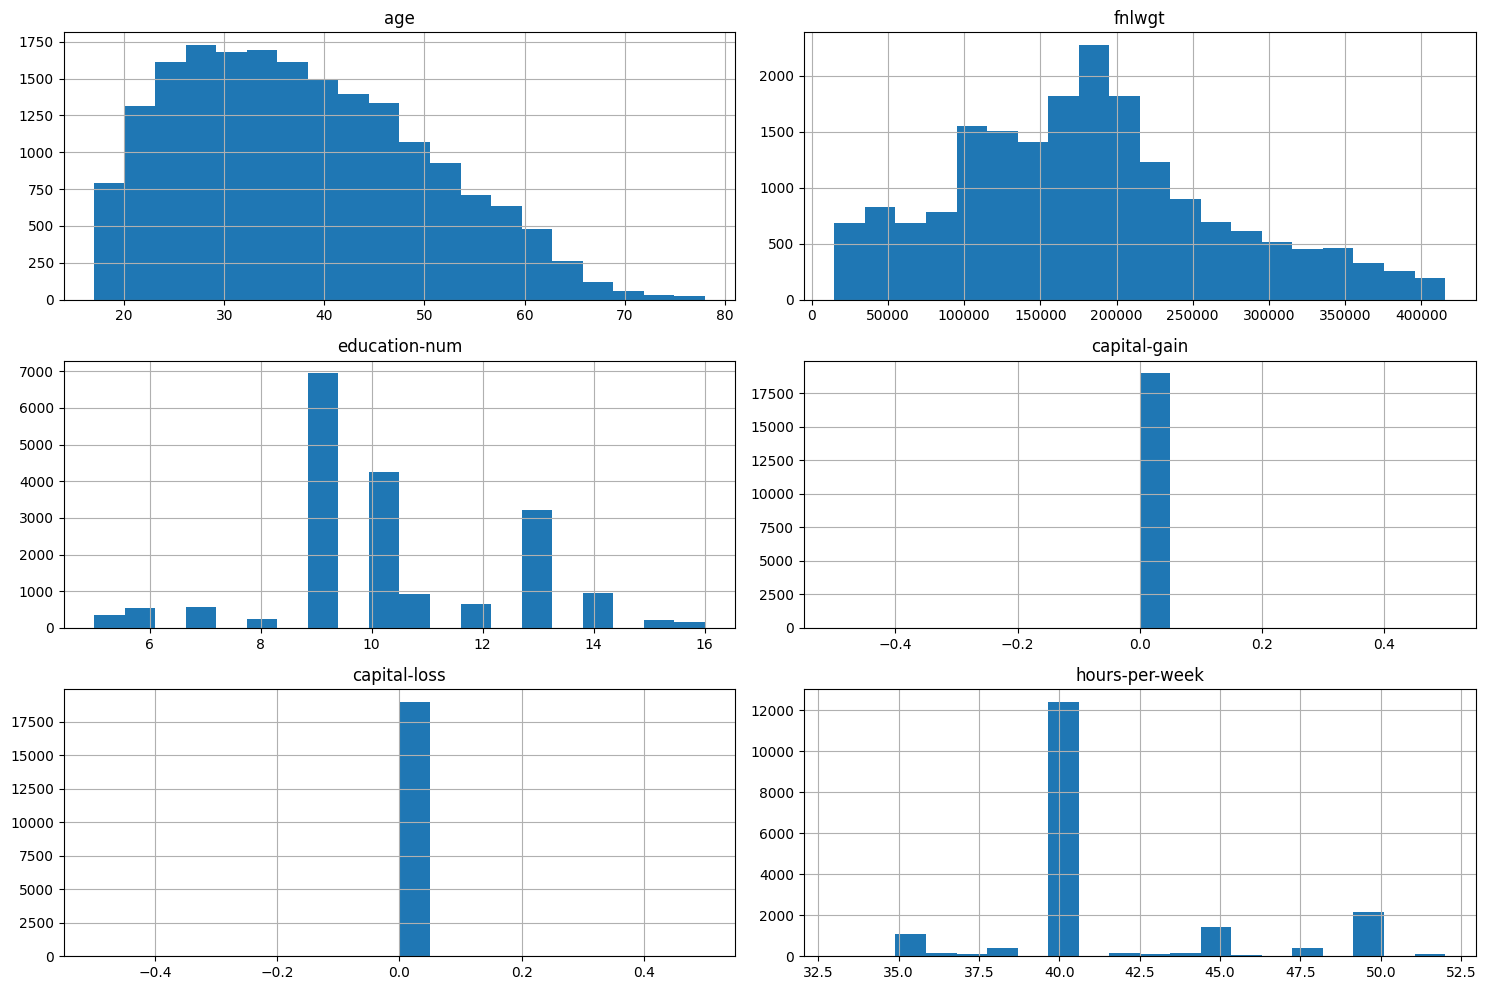

In [7]:
import matplotlib.pyplot as plt

# Plot histograms for all numeric columns
# Helps visualize data distributions
df.hist(bins=20, figsize=(15,10))
plt.tight_layout()
plt.show()

**Insight:** Revealed that most individuals are aged 25–45, work ~40 hours/week, and have little to no capital gain/loss.

#### Boxplots

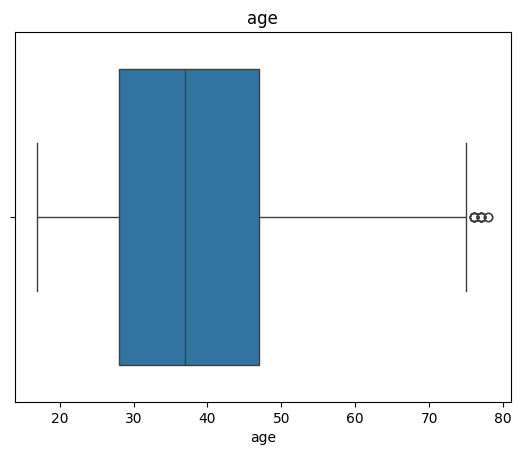

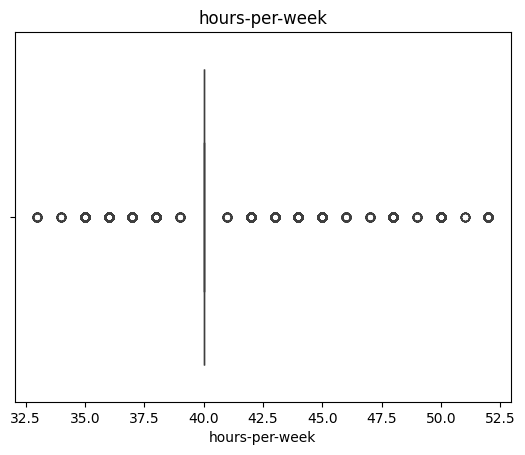

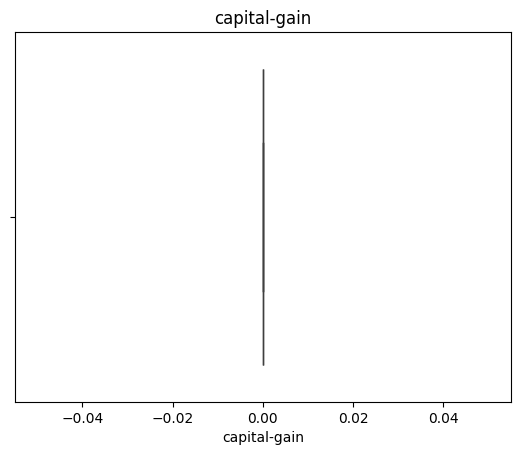

In [8]:
import seaborn as sns

# Visualize outliers and distributions for selected features
# Boxplots highlight median, quartiles, and potential outliers
for col in ['age', 'hours-per-week', 'capital-gain']:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

**Insight:** Showed outliers in *age*, *hours-per-week*, and especially *capital-gain*, which were filtered using the IQR method to reduce noise.
- The boxplot for *age* confirmed mild outliers at both extremes, especially below 18 and above 70, but most data lies within the IQR range.
- For *hours-per-week*, there were visible outliers beyond 60 hours/week.
- The *capital-gain* boxplot showed extreme outliers (e.g., >10,000), suggesting that only a few individuals received significant capital income.

#### Correlation Heatmap

<Axes: >

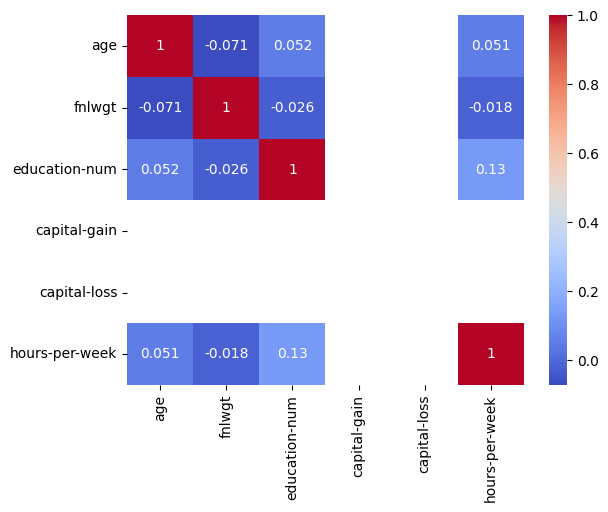

In [9]:
# Shows correlation between numeric features
# Useful for identifying multicollinearity
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')

**Insight:**
- *age* and *hours-per-week* showed right-skewed distributions with some extreme values.
- *capital-gain* and *capital-loss* had a large number of zeros with few high-value outliers, suggesting sparse financial transactions among most individuals.

#### Categorical Relationship

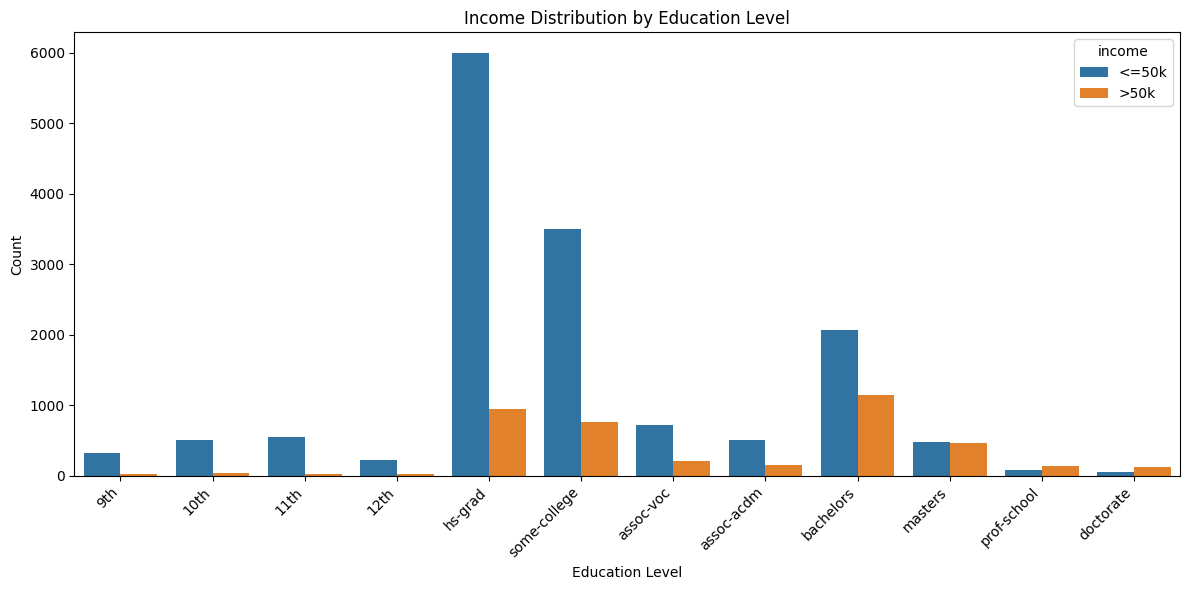

In [10]:
# Explore income distribution across different education levels
# Helps detect influence of education on income level
# Define custom order of education levels
edu_order = [
    '9th', '10th', '11th', '12th', 'hs-grad',
    'some-college', 'assoc-voc', 'assoc-acdm',
    'bachelors', 'masters', 'prof-school', 'doctorate'
]

# Plot with sorted x-axis
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='education', hue='income', order=edu_order)

plt.xticks(rotation=45, ha='right')
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.title("Income Distribution by Education Level")
plt.tight_layout()
plt.show()

**Insight:** Income distribution by education level showed that individuals with higher education levels (e.g., bachelor's or higher) had a greater proportion earning more than 50K, indicating a clear correlation between education and income. There are a lot of high school individuals working on jobs earning less than 50K. 